<a href="https://colab.research.google.com/github/Saicharan39/Machine-Learning/blob/main/cat_vs_dog__classification_using_MobileNet_V2_transfer_learning_model_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle


In [ ]:
#configuring path for .json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Fetching dataset using API

In [ ]:
!kaggle competitions download -c dogs-vs-cats

 98% 799M/812M [00:07<00:00, 155MB/s]
100% 812M/812M [00:07<00:00, 108MB/s]


Extracting zip file

In [ ]:
from zipfile import ZipFile
dataset='/content/dogs-vs-cats.zip'
with ZipFile(dataset,'r')as zip:
  zip.extractall()
  print("files are extracted")

files are extracted


Files from training data

In [ ]:
from zipfile import ZipFile
dataset='/content/train.zip'
with ZipFile(dataset,'r')as zip:
  zip.extractall()
  print("files are extracted")

files are extracted


In [ ]:
import os
#counting no.of files in train folder
path,dirs,files=next(os.walk('/content/train'))
file_count=len(files)
print('no.of images:',file_count)

no.of images: 25000


printing images

In [ ]:
file_names=os.listdir('/content/train')
print(file_names)

['cat.6365.jpg', 'dog.3931.jpg', 'cat.8732.jpg', 'cat.8877.jpg', 'cat.10519.jpg', 'dog.2158.jpg', 'cat.5242.jpg', 'dog.5448.jpg', 'cat.5615.jpg', 'cat.2554.jpg', 'dog.570.jpg', 'dog.1305.jpg', 'dog.4615.jpg', 'cat.8319.jpg', 'cat.5016.jpg', 'dog.9682.jpg', 'dog.3795.jpg', 'cat.11866.jpg', 'cat.12067.jpg', 'dog.1293.jpg', 'dog.261.jpg', 'dog.3155.jpg', 'dog.5077.jpg', 'dog.4678.jpg', 'cat.3869.jpg', 'dog.2143.jpg', 'dog.2048.jpg', 'cat.9657.jpg', 'cat.7937.jpg', 'cat.3867.jpg', 'cat.7809.jpg', 'dog.10864.jpg', 'cat.8392.jpg', 'dog.1352.jpg', 'cat.9417.jpg', 'dog.5308.jpg', 'cat.2588.jpg', 'dog.8316.jpg', 'dog.9262.jpg', 'cat.10723.jpg', 'dog.8268.jpg', 'dog.2059.jpg', 'cat.12202.jpg', 'cat.6199.jpg', 'dog.1908.jpg', 'cat.8208.jpg', 'dog.10517.jpg', 'dog.2325.jpg', 'cat.6875.jpg', 'dog.917.jpg', 'dog.3107.jpg', 'cat.2170.jpg', 'cat.9650.jpg', 'dog.9785.jpg', 'cat.6041.jpg', 'cat.9544.jpg', 'cat.10070.jpg', 'cat.3405.jpg', 'cat.553.jpg', 'dog.7364.jpg', 'dog.2495.jpg', 'cat.5131.jpg', 'ca

Importing dependencies

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow#alternative to openCV

Displaying Images

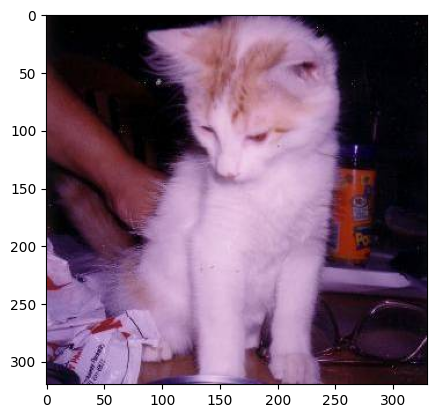

In [ ]:
img=mpimg.imread('/content/train/cat.7809.jpg')
imgplot=plt.imshow(img)
plt.show()

identifying if it is a dog or cat from labelled data

In [ ]:
file_name=os.listdir('/content/train')
for i in range(10):
 name=file_name[i]
 print(name[0:3])
print('considered first 10 images with their first 5 characters from string')

cat
dog
cat
cat
cat
dog
cat
dog
cat
cat
considered first 10 images with their first 5 characters from string


In [ ]:
file_name=os.listdir('/content/train')
dog_count=0
cat_count=0
for i in file_name:
  name=i[0:3]
  if name=='dog':
   dog_count+=1
  else:
   cat_count+=1
print("no.of dogs:-",dog_count)
print("no.of cats:-",cat_count)


no.of dogs:- 12500
no.of cats:- 12500


Image processing

In [ ]:
#creating folder to store resized images
os.mkdir('/content/image_resized')


Resizing Image

In [ ]:
original_folder = '/content/train'
resized_folder = '/content/image_resized'

for i in range(2000):
    file_name = os.listdir(original_folder)[i]
    img_path = os.path.join(original_folder, file_name)

    img = Image.open(img_path)
    img = img.resize((224, 224))
    img = img.convert('RGB')

    new_img_path = os.path.join(resized_folder, file_name)
    img.save(new_img_path)


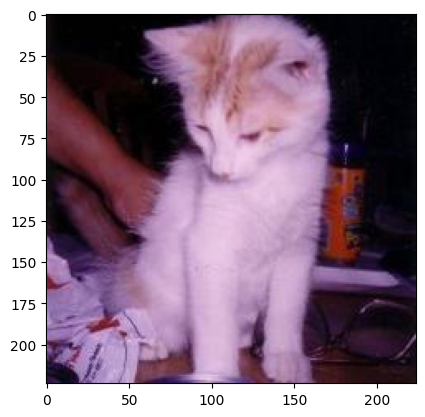

In [ ]:
#displaying resized image
img=mpimg.imread('/content/image resizedcat.7809.jpg')
imgplot=plt.imshow(img)
plt.show()

Creating labels for cats and dogs cat-0 dog-1

In [ ]:
file_name=os.listdir('/content/image_resized/')
labels=[]
for i in range(2000):
  filename=file_name[i]
  animal=filename[0:3]
  if animal=='dog':
   labels.append(1)
  else:
    labels.append(0)



In [ ]:
print(len(file_name))
print(file_name[0:5])
print(labels[0:5])
print(len(labels))

2000
['cat.6365.jpg', 'dog.3931.jpg', 'cat.8732.jpg', 'cat.8877.jpg', 'cat.10519.jpg']
[0, 1, 0, 0, 0]
2000


In [ ]:
#counting no.of cats and dogs in no. of 2000 images
values,counts=np.unique(labels,return_counts=True)
print(values)
print(counts)


[0 1]
[ 968 1032]


converting images into numpy arrays

In [ ]:
import cv2
import glob

In [ ]:
image_directory = '/content/image_resized/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [ ]:
print(dog_cat_images)

[[[[206 223 236]
   [206 223 236]
   [206 223 236]
   ...
   [175 193 200]
   [174 194 199]
   [136 156 161]]

  [[206 223 236]
   [206 223 236]
   [206 223 236]
   ...
   [174 192 199]
   [167 187 192]
   [127 147 152]]

  [[205 222 235]
   [205 222 235]
   [205 222 235]
   ...
   [173 191 198]
   [157 177 182]
   [115 135 140]]

  ...

  [[ 79  51  34]
   [ 79  51  34]
   [ 79  51  34]
   ...
   [ 87 100  98]
   [ 87 100  98]
   [ 90 103 101]]

  [[ 83  53  34]
   [ 81  54  34]
   [ 80  52  35]
   ...
   [ 86  99  97]
   [ 89 102 100]
   [ 95 108 106]]

  [[ 85  55  36]
   [ 84  54  35]
   [ 80  52  35]
   ...
   [ 84  97  95]
   [ 86  99  97]
   [ 94 107 105]]]


 [[[ 54  82  93]
   [ 46  73  83]
   [  4  29  39]
   ...
   [238 244 243]
   [244 250 249]
   [225 231 230]]

  [[ 62  90 101]
   [ 53  80  90]
   [  9  34  44]
   ...
   [224 232 231]
   [232 238 237]
   [240 248 247]]

  [[ 63  91 102]
   [ 55  82  92]
   [  9  34  44]
   ...
   [215 226 224]
   [220 228 227]
   [246 255

In [ ]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)




*   2000-images
*   224-rows


*   224-columns
*   3-RGB






In [ ]:
X=dog_cat_images
Y=np.asarray(labels)


Train and Test Split

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


In [ ]:
# scaling the data
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [ ]:
print(X_train_scaled)

[[[[0.75294118 0.70588235 0.65882353]
   [1.         0.99215686 0.9372549 ]
   [0.89019608 0.81176471 0.74509804]
   ...
   [0.31764706 0.48627451 0.30980392]
   [0.32941176 0.49019608 0.31372549]
   [0.29019608 0.44313725 0.2627451 ]]

  [[0.77647059 0.72941176 0.69019608]
   [1.         1.         0.94509804]
   [0.8745098  0.79607843 0.72941176]
   ...
   [0.17254902 0.32941176 0.16470588]
   [0.23529412 0.38431373 0.21960784]
   [0.35294118 0.49411765 0.32156863]]

  [[0.68627451 0.63529412 0.60392157]
   [1.         0.96078431 0.91372549]
   [0.89019608 0.80784314 0.74901961]
   ...
   [0.38039216 0.51372549 0.36862745]
   [0.31372549 0.44313725 0.29803922]
   [0.19215686 0.31372549 0.16078431]]

  ...

  [[0.21176471 0.34509804 0.18431373]
   [0.29803922 0.43137255 0.27058824]
   [0.28627451 0.41960784 0.25882353]
   ...
   [0.20784314 0.34117647 0.18431373]
   [0.29411765 0.42745098 0.26666667]
   [0.43921569 0.57254902 0.41176471]]

  [[0.36862745 0.50196078 0.34117647]
   [0.4

Building neural network

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

In [ ]:
mobilenet_model='https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [ ]:
num_of_classes = 2

model = tf.keras.Sequential([

    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)

])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [ ]:
model.compile(
    optimizer = 'adam',#best optimizer
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']#accuracy
)

In [ ]:
model.fit(X_train_scaled, Y_train, epochs=5)

Epoch 1/5
50/50 [==============================] - 55s 996ms/step - loss: 0.1727 - acc: 0.9375
Epoch 2/5
50/50 [==============================] - 55s 1s/step - loss: 0.0650 - acc: 0.9794
Epoch 3/5
50/50 [==============================] - 50s 987ms/step - loss: 0.0480 - acc: 0.9869
Epoch 4/5
50/50 [==============================] - 50s 998ms/step - loss: 0.0414 - acc: 0.9900
Epoch 5/5
50/50 [==============================] - 56s 1s/step - loss: 0.0322 - acc: 0.9906


In [ ]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

13/13 [==============================] - 15s 951ms/step - loss: 0.0706 - acc: 0.9750
Test Loss = 0.07058941572904587
Test Accuracy = 0.9750000238418579


Predictive System

Path of the image to be predicted: /dog.jpg


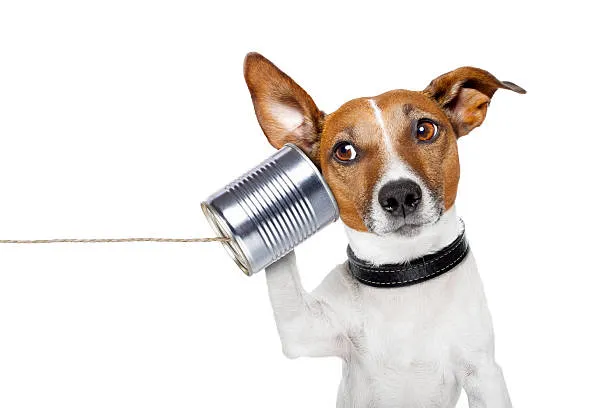

1/1 [==============================] - 1s 783ms/step
[[-4.4134316  2.365046 ]]
1
The image represents a Dog


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)#instead of pillow opencv is used for image resizing
#opencv doesnot works in google collab instead we used

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')

Path of the image to be predicted: /cat.jpg


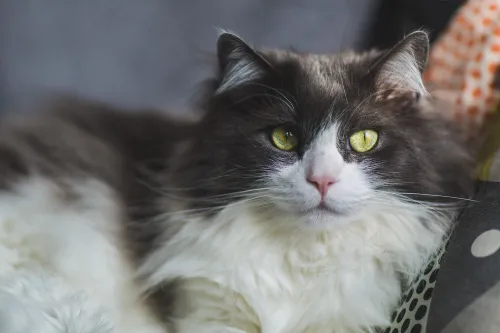

1/1 [==============================] - 0s 89ms/step
[[ 4.2313805 -4.4236717]]
0
The image represents a Cat


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)#instead of pillow opencv is used for image resizing
#opencv doesnot works in google collab instead we used

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')

Path of the image to be predicted: /lion.jpg


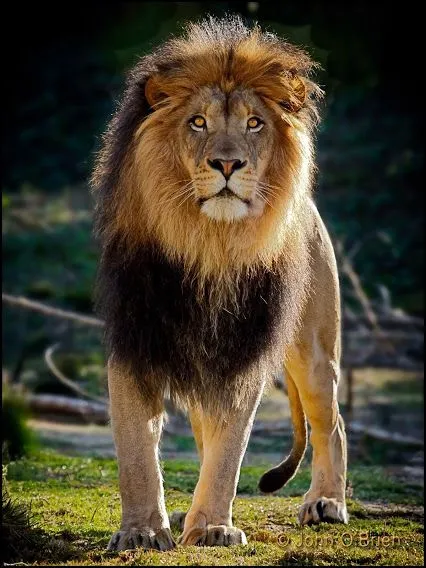

1/1 [==============================] - 0s 137ms/step
[[-0.05453443 -0.50851125]]
0
The image represents a Cat


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)#instead of pillow opencv is used for image resizing
#opencv doesnot works in google collab instead we used

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')

Path of the image to be predicted: /subramanyam.jpg


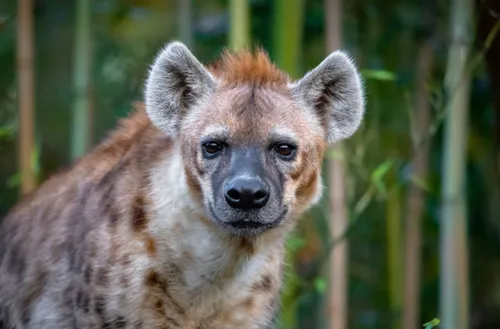

1/1 [==============================] - 0s 84ms/step
[[-0.96471703 -0.9509231 ]]
1
The image represents a Dog


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)#instead of pillow opencv is used for image resizing
#opencv doesnot works in google collab instead we used

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')

Path of the image to be predicted: /tiger.jpg


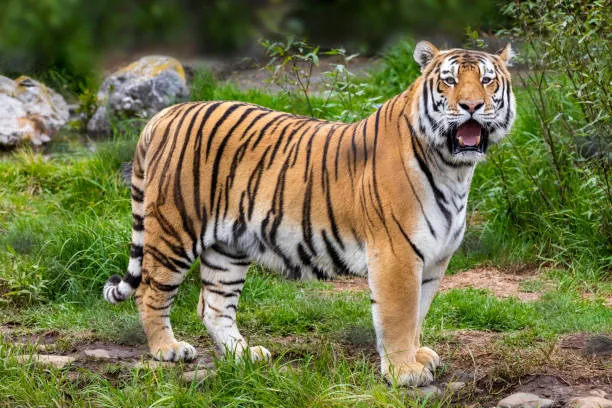

1/1 [==============================] - 0s 76ms/step
[[ 1.2095708  -0.44665062]]
0
The image represents a Cat


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)#instead of pillow opencv is used for image resizing
#opencv doesnot works in google collab instead we used

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')

Path of the image to be predicted: /wolf.jpg


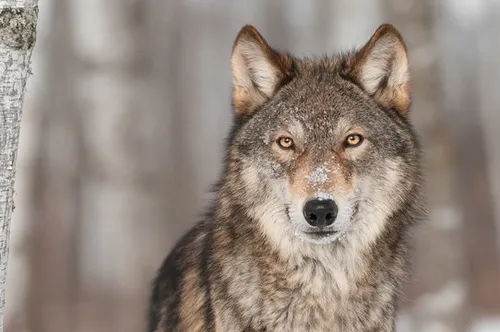

1/1 [==============================] - 0s 65ms/step
[[-2.6114433  1.1522685]]
1
The image represents a Dog


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)#instead of pillow opencv is used for image resizing
#opencv doesnot works in google collab instead we used

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')

accuracy of model is almost 97%